In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [4]:
data=pd.read_csv("Mall_Customers.csv")

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# Select only numeric columns and calculate correlation
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


C:\Users\adity\AppData\Local\Temp\ipykernel_8360\2958858929.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


Text(0, 0.5, 'Count')

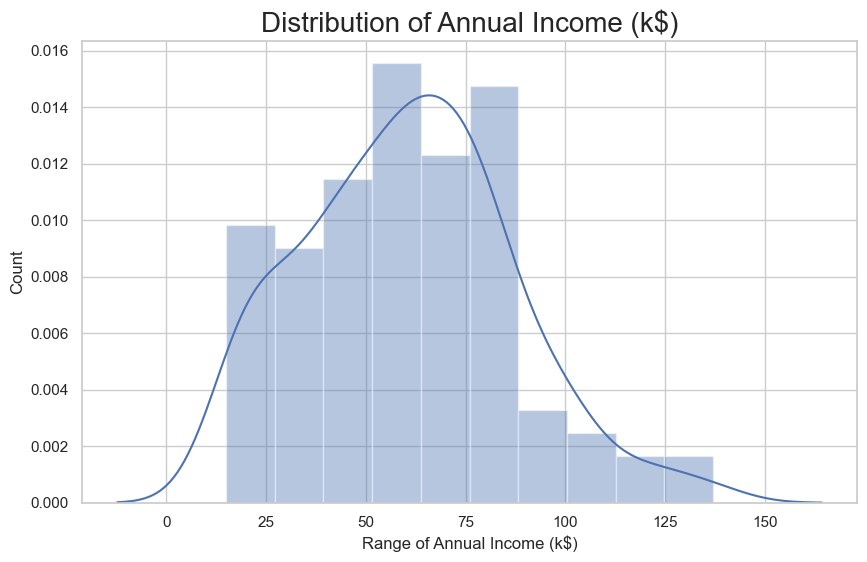

In [13]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

C:\Users\adity\AppData\Local\Temp\ipykernel_8360\2490505638.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


Text(0, 0.5, 'Count')

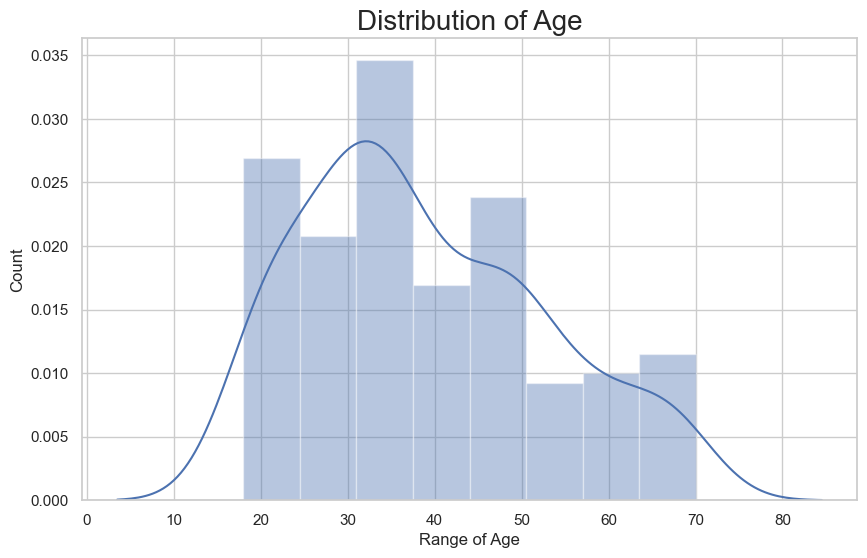

In [15]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

C:\Users\adity\AppData\Local\Temp\ipykernel_8360\4285511262.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


Text(0, 0.5, 'Count')

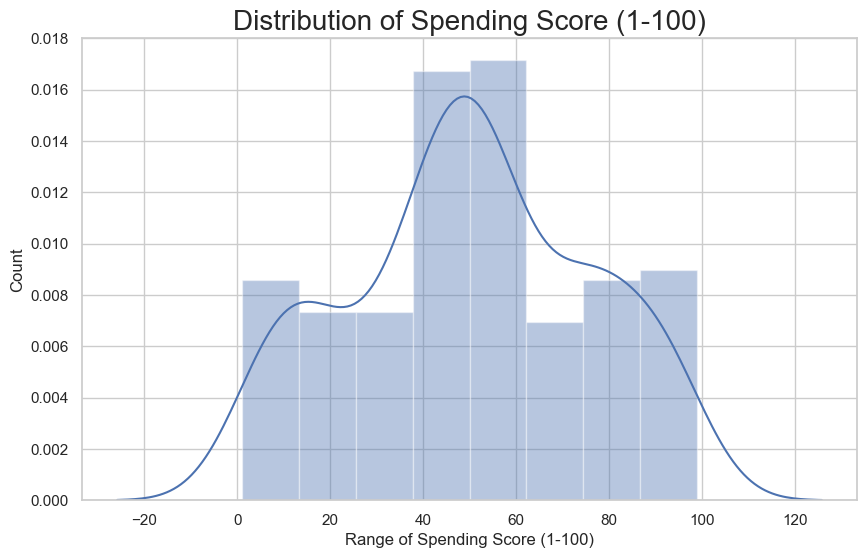

In [17]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

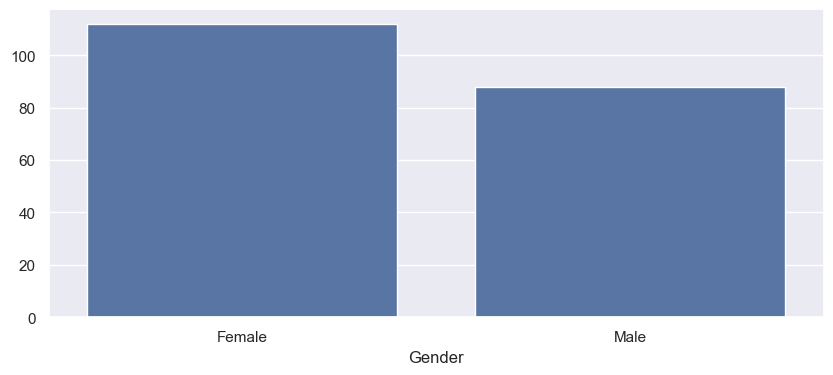

In [21]:
genders = data['Gender'].value_counts()  # Adjust the column name accordingly
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()


In [25]:
df1 = data[["CustomerID", "Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]
X = df1[["Annual Income (k$)", "Spending Score (1-100)"]]


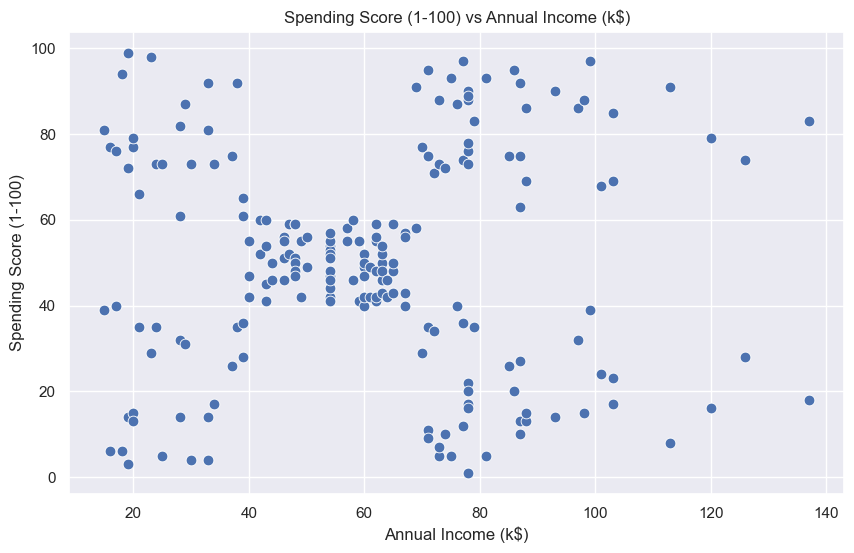

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', data = X ,s = 60
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [29]:
from sklearn.cluster import KMeans

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

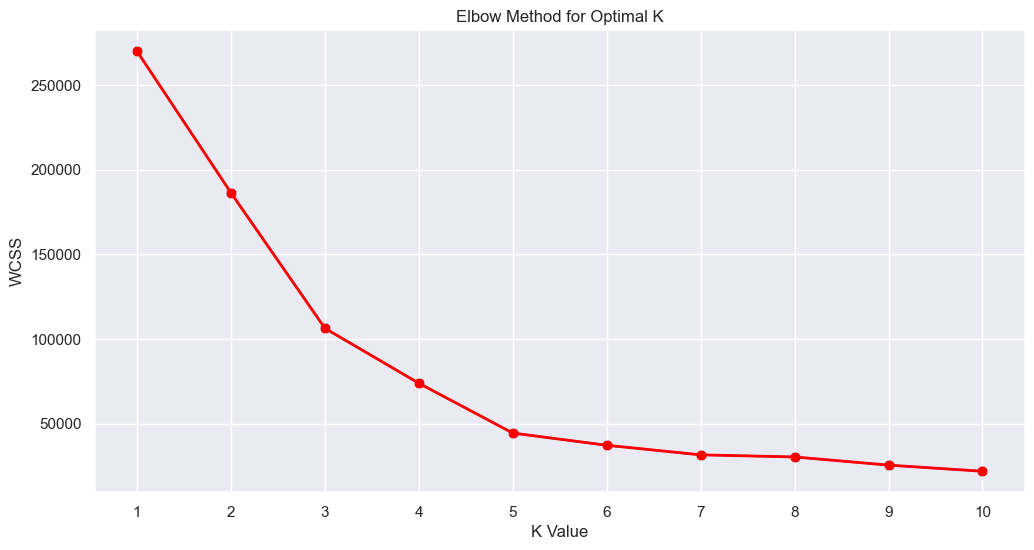

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

wcss = []  # Initialize the list to store WCSS values

# Iterate over the range of cluster values from 1 to 10
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)  # Fit the model to the data X
    wcss.append(km.inertia_)  # Append the WCSS (within-cluster sum of squares)

# Plot the elbow curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker="o")
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [35]:
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


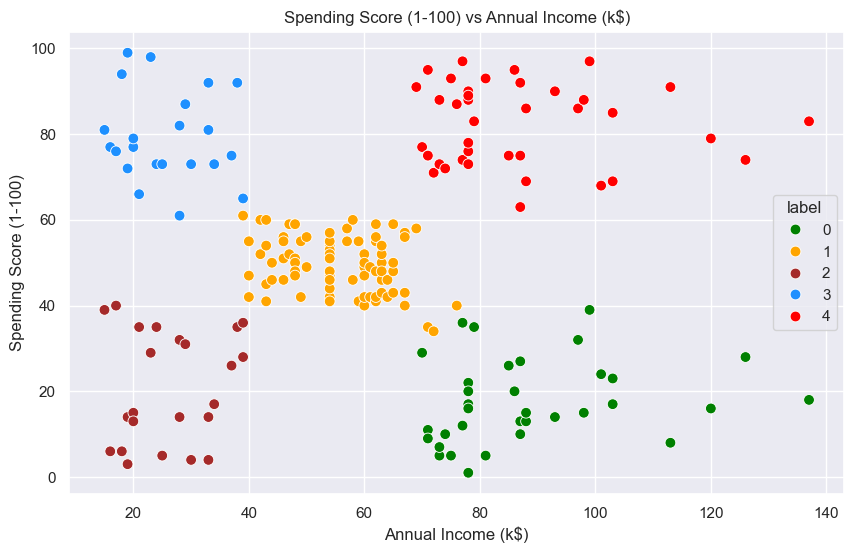

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",

palette=['green','orange','brown','dodgerblue','red'],

legend='full',data = df1 ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

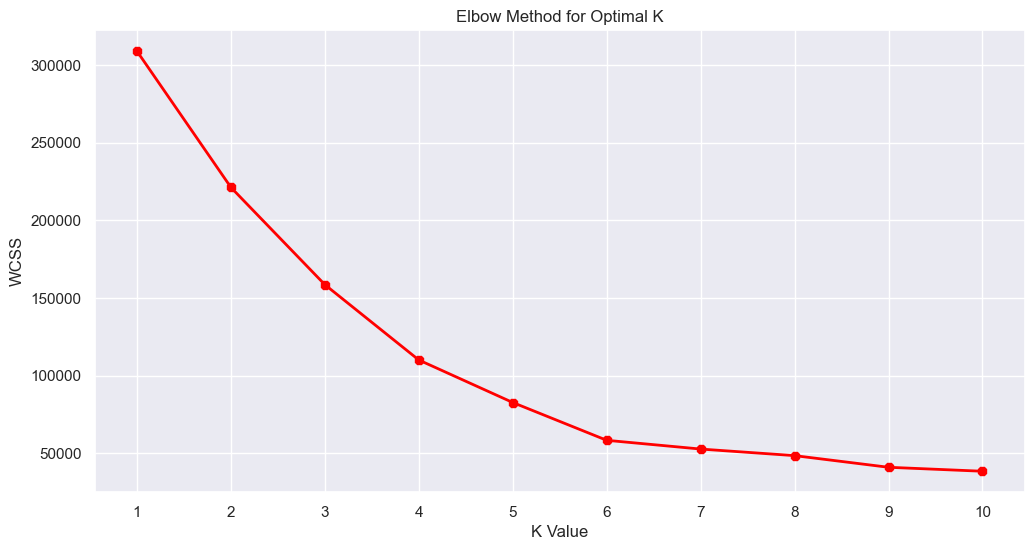

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

wcss = []  # Initialize the list to store WCSS values

# Iterate over the range of cluster values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)  # Fit the model to the data X2 for each value of k
    wcss.append(kmeans.inertia_)  # Append the WCSS (within-cluster sum of squares)

# Plot the elbow curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [43]:
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
data["label"] = y2
#The data with labels
data.head()

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


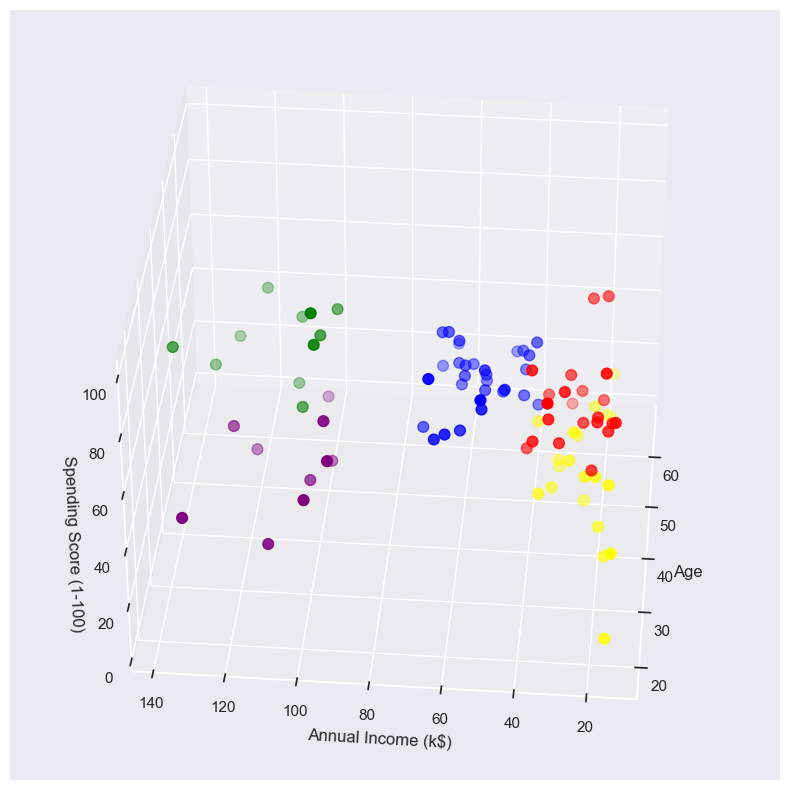

In [45]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0],
data["Spending Score (1-100)"][data.label == 0], c='purple', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1],
data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2],
data["Spending Score (1-100)"][data.label == 2], c='blue', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3],
data["Spending Score (1-100)"][data.label == 3], c='green', s=60)
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4],
data["Spending Score (1-100)"][data.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [47]:
cust1=data[data["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print(" ")
cust2=data[data["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print(" ")
cust3=data[data["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print(" ")
cust4=data[data["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print(" ")
cust5=data[data["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("------------------------------------------")

Number of customer in 1st group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
 
Number of customer in 2nd group= 30
They are - [ 43  47  51  55  56  57  60  67  72  77  78  80  82  84  86  90  93  94
  97  99 102 105 108 113 118 119 120 122 123 127]
 
Number of customer in 3rd group= 10
They are - [181 183 185 187 189 191 193 195 197 199]
 
Number of customer in 4th group= 11
They are - [180 182 184 186 188 190 192 194 196 198 200]
 
Number of customer in 5th group= 21
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 45]
------------------------------------------
